In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('../'))
from dataset import SNPmarkersDataset

In [2]:
validation_dataset = SNPmarkersDataset(mode = "validation", dir_path= "../../Data")

# Result analysis GBLUP

The script used to generate the results can be found in `Scripts/GBLUP.sh`. We use then the results found in the .pred file of each phenotype and the true results to compute the pearson correlation and MAE for every phenotype.

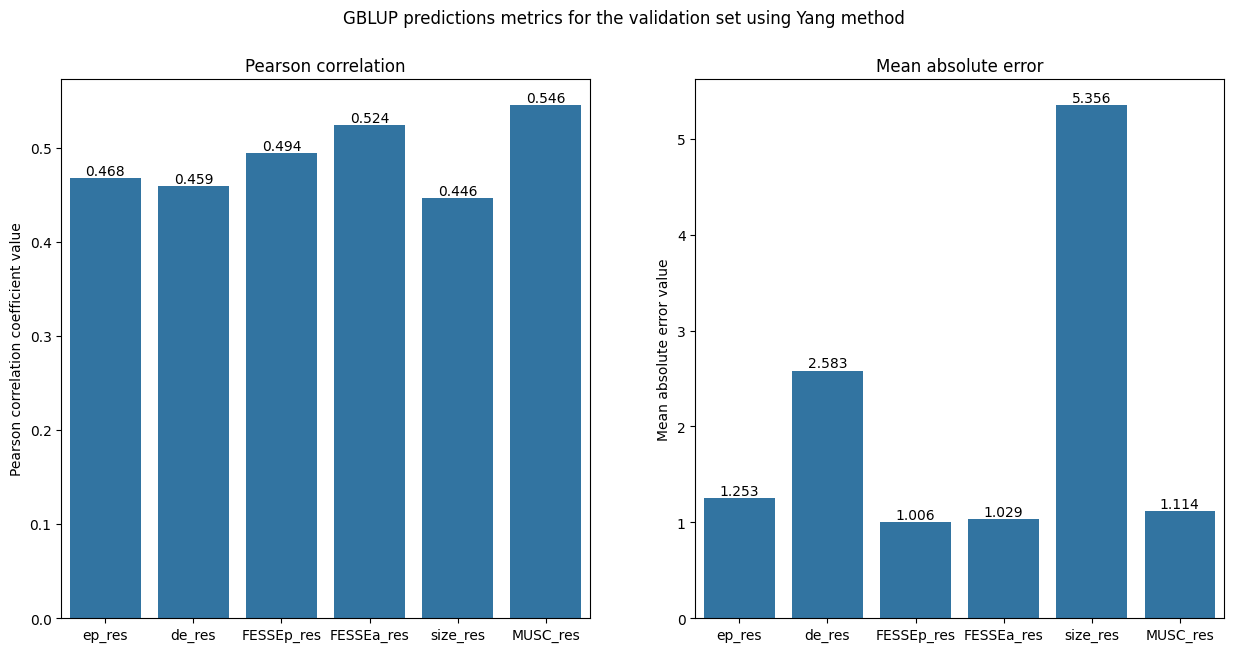

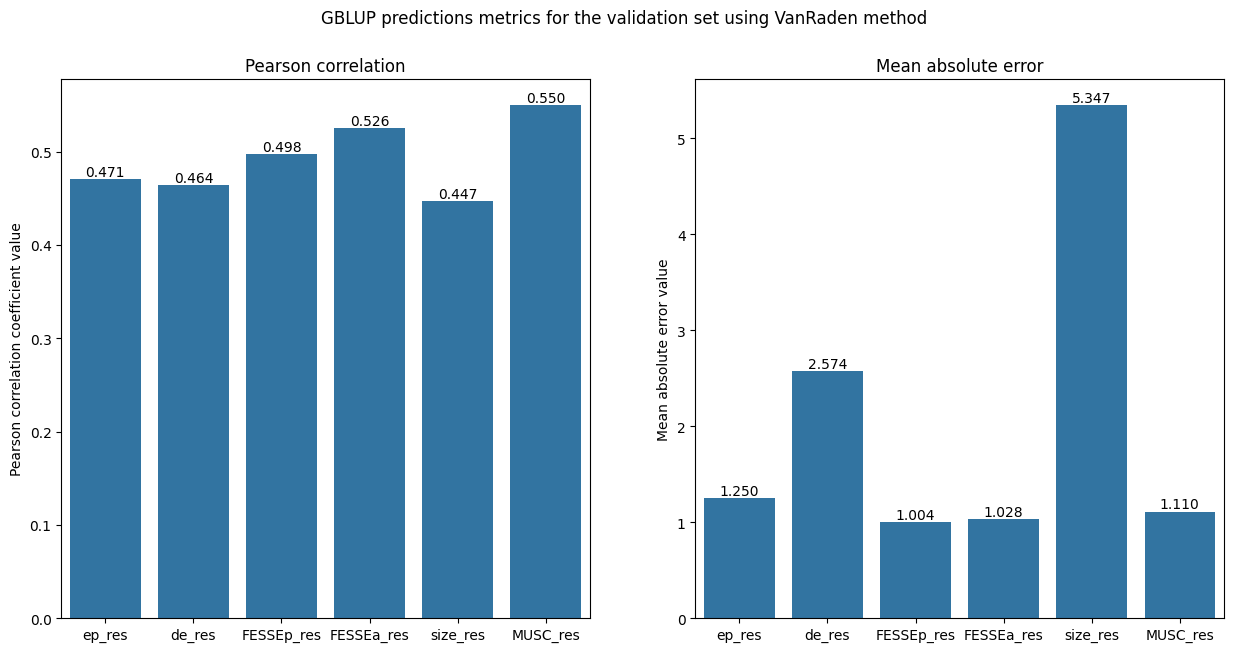

In [3]:
for method in ["Yang", "VanRaden"]:
    correlation = []
    MAE = []
    for pheno in validation_dataset.phenotypes.keys():
        validation_dataset.set_phenotypes = pheno
        indexes = validation_dataset.get_all_SNP().index
        
        predictions = pd.read_csv(f"../GBLUP/{pheno}/gblup_{method}.pred", sep = "\t", index_col= 1).loc[indexes]

        true_values = validation_dataset.phenotypes[pheno]

        correlation.append(pearsonr(predictions["Total"], true_values).statistic)
        MAE.append(mean_absolute_error(predictions["Total"], true_values))

    fig,(ax1, ax2) = plt.subplots(1,2, figsize=(15 , 7))
    fig.suptitle(f"GBLUP predictions metrics for the {validation_dataset.mode} set using {method} method")
    sns.barplot(x=validation_dataset.phenotypes.keys(), y=correlation, ax = ax1)
    ax1.set_title("Pearson correlation")
    ax1.set_ylabel("Pearson correlation coefficient value")

    for bar in ax1.containers:
        ax1.bar_label(bar, fmt='%.3f')

    sns.barplot(x=validation_dataset.phenotypes.keys(), y= MAE, ax=ax2)
    ax2.set_ylabel(f"Mean absolute error value")
    ax2.set_title("Mean absolute error")

    for bar in ax2.containers:
        ax2.bar_label(bar, fmt='%.3f')
    plt.show()